<a href="https://colab.research.google.com/github/AbrahamB2603/IAyRN/blob/Actividad6/AF6_ArbolDeDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 6: Aprendizaje supervisado, árbol de decisión
# Ramiro Emiliano Martinez De La Cruz - 2014197 - Martes N4
# María Fernanda Garza Barbosa - 1945003 - Martes N4
# Karla Judith Corona Castro - 1923390 - Martes N4
# Abraham Giovanni Aguirre Bravo 2014222 - N4

# Librerias

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Cargar datos

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Eliminar columnas innecesarias
df = df.drop(columns=["id", "Unnamed: 32"])

# Convertir diagnóstico a binario
df["diagnosis"] = df["diagnosis"].map({'M': 1, 'B': 0})

# Separar características y etiquetas
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Preprocesamiento de datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selección y entrenamiento del modelo

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Prueba del modelo

In [ ]:
# Obtener matriz de confusión
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)


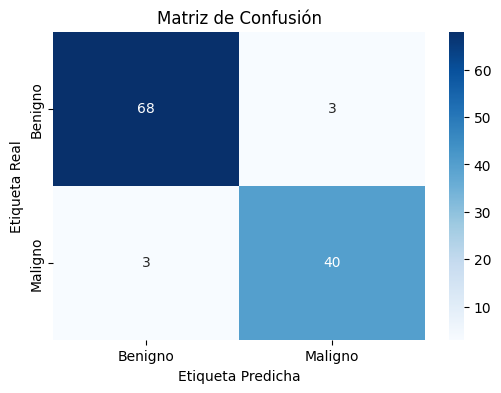

In [ ]:
# Mostrar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benigno", "Maligno"],
            yticklabels=["Benigno", "Maligno"])
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
sample_predictions = clf.predict(X_test[:3])
['Maligno' if p == 1 else 'Benigno' for p in sample_predictions]

['Benigno', 'Maligno', 'Maligno']

In [ ]:
y_pred = clf.predict(X_test)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nPrecisión:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Matriz de Confusión:
 [[68  3]
 [ 3 40]]

Precisión: 0.9473684210526315

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



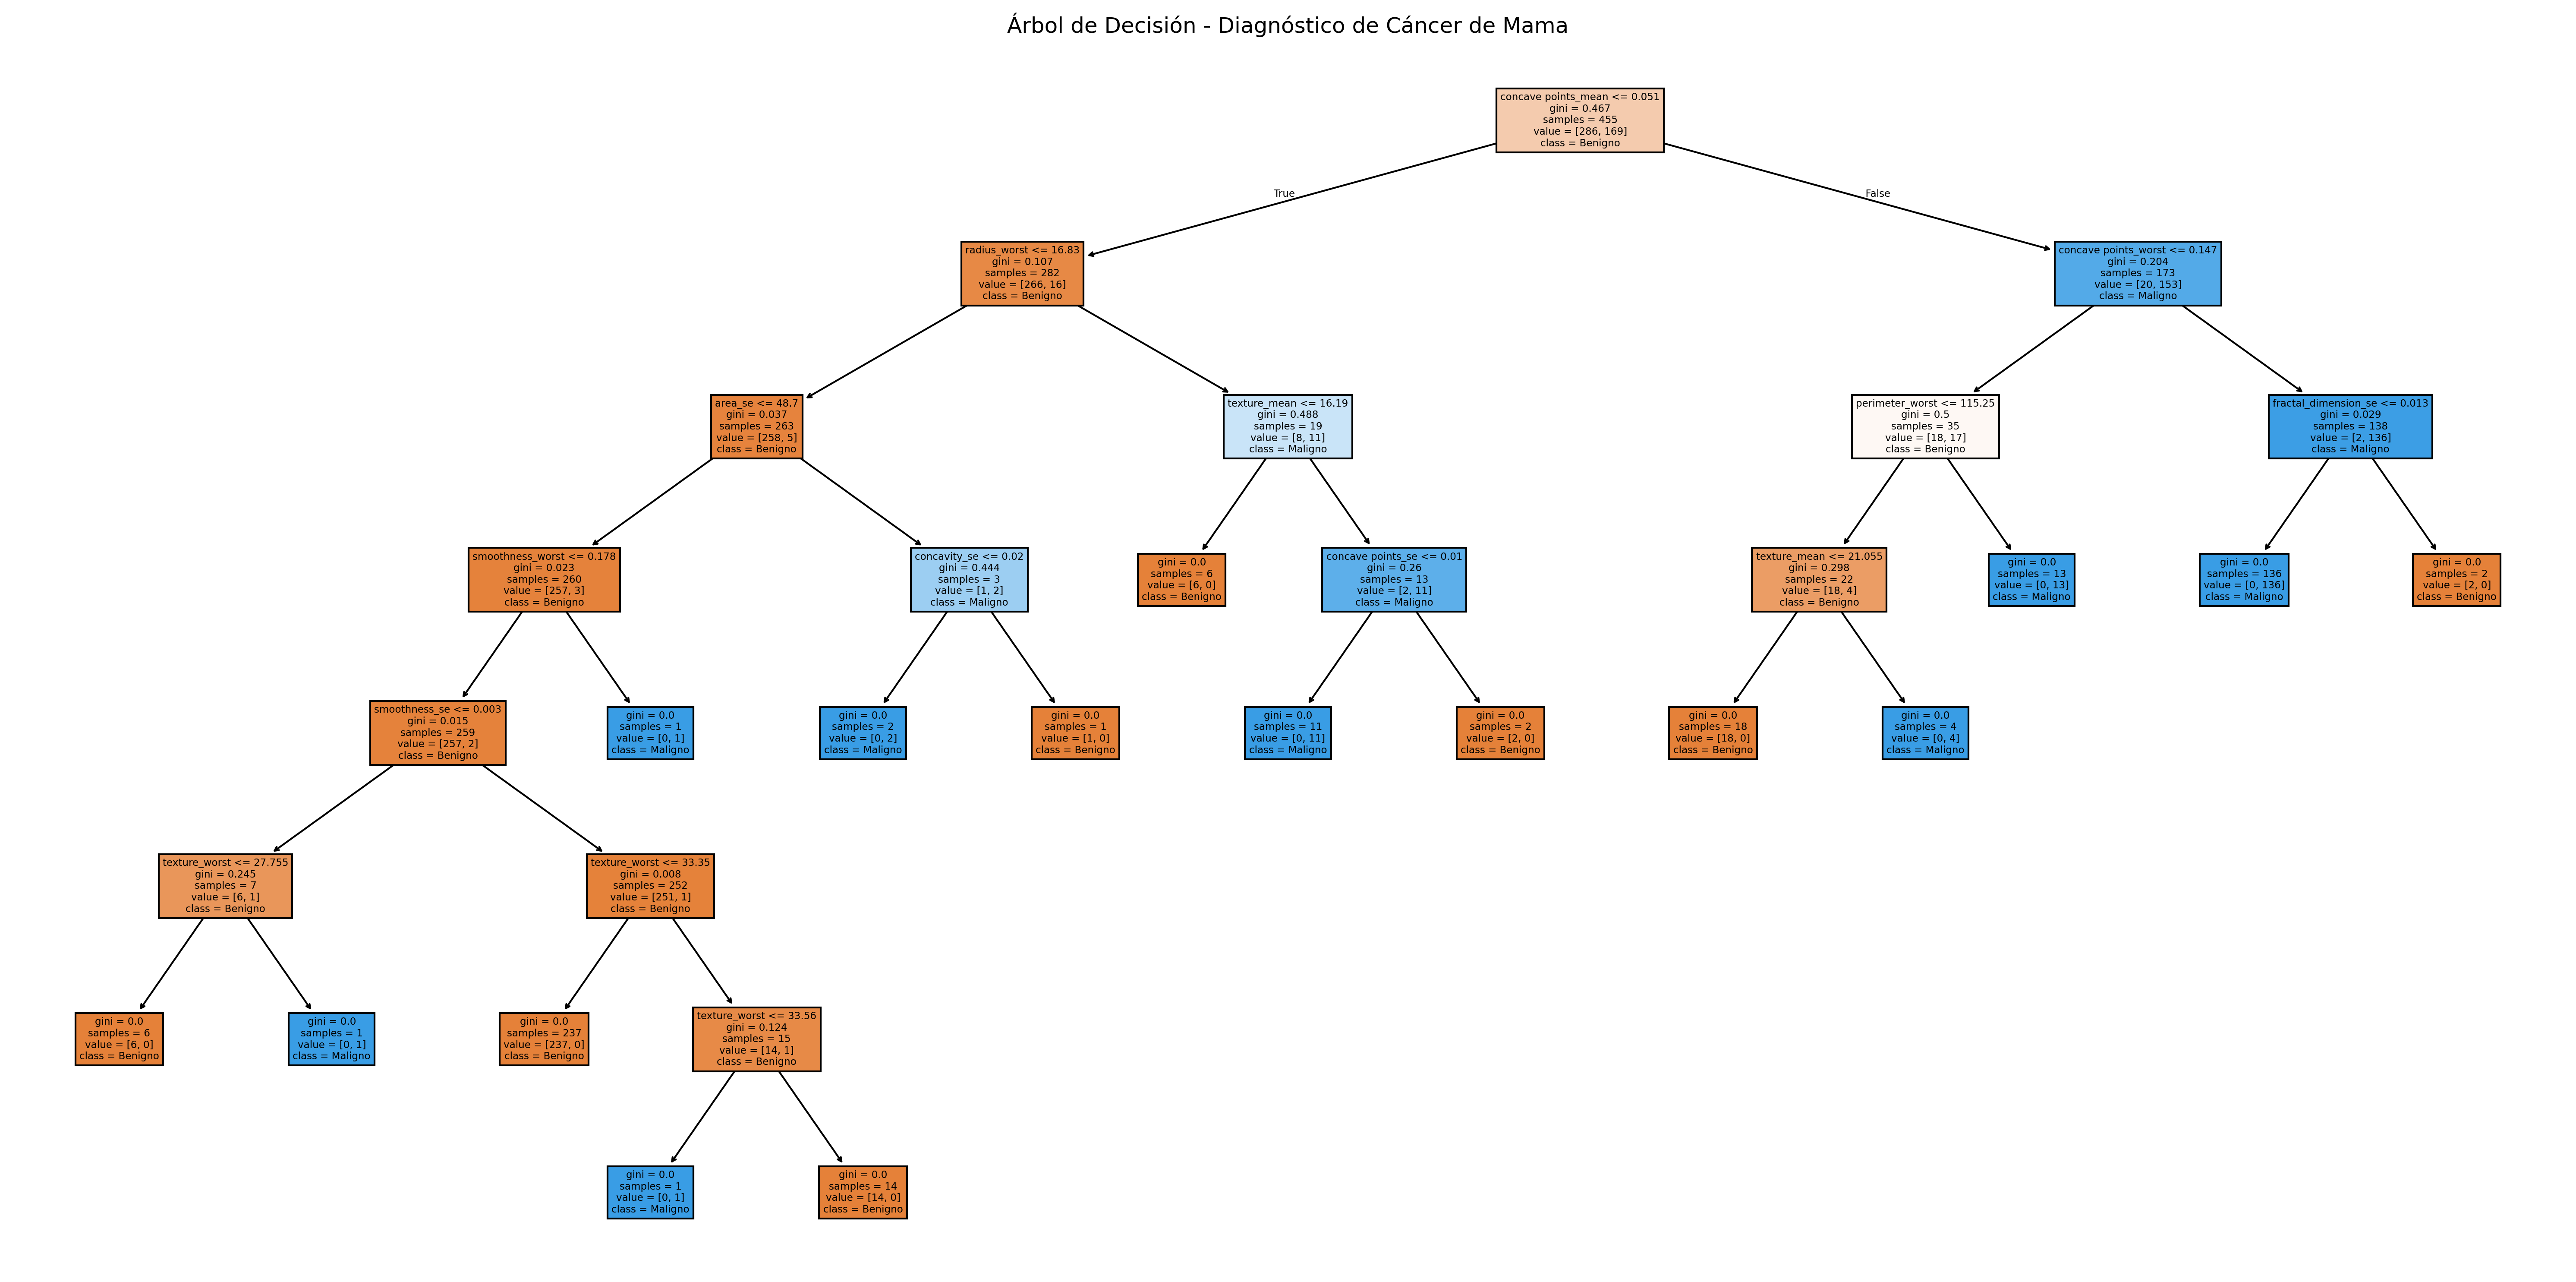

In [ ]:
# Visualizar árbol de decisión
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(clf, feature_names=X.columns, class_names=["Benigno", "Maligno"], filled=True)
plt.title("Árbol de Decisión - Diagnóstico de Cáncer de Mama")
plt.tight_layout()
plt.show()